# Deep Homography Estimation
### Esteban Reyes Saldaña
Implementation of [Deep Homography Estimation](https://arxiv.org/pdf/1606.03798.pdf)


june 5, 2023

# Data Generation for Homography Estimation

The paper propousal from generating the dataset sets as follow

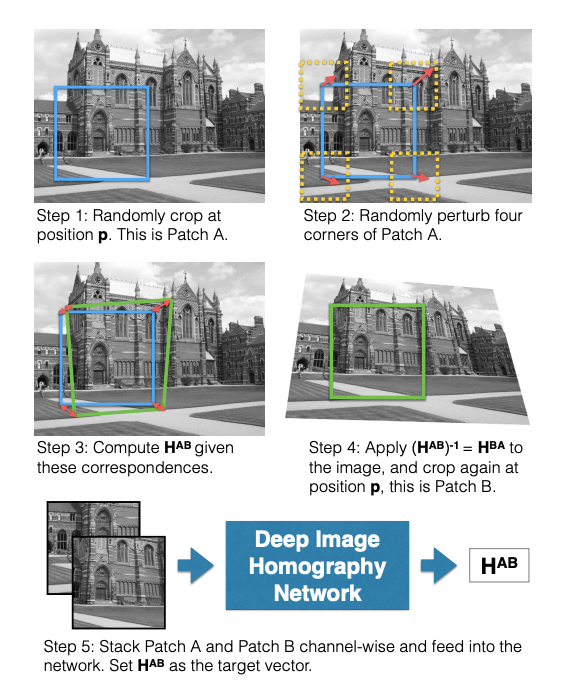

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import shutil
import os

In [2]:
def Preprocessing(folder, img_name, img_dim = (320, 240), rho = 32, patch_dim = (128, 128), plot_img = False, return_corners = False) :
    I = cv2.imread(os.path.join(folder,img_name), 0) 
    
    try:
        I = cv2.resize(I, img_dim)
    except:
        return 'No'
    
    ## STEP 1: RANDOMLY CROP AT POSITION P
    # get image patch 
    # lu ------ ru 
    # |         |
    # |         |
    # ld ------ rd
    # fixed as https://github.com/mez/deep_homography_estimation/blob/master/Dataset_Generation_Visualization.ipynb
    # avoid borders to prevent bordering artifacts
    lu = np.array((32, 32))
    ru = np.array((lu[0], lu[1] + patch_dim[1]))
    ld = np.array((lu[0] + patch_dim[0], lu[1]))
    rd = np.array((lu[0] + patch_dim[0], lu[1] + patch_dim[1]))
    
    corners = [lu, ld, rd, ru]

    ## STEP 2: RANDOMLY PERTURBFOUR CORNERS OF PACTCH
    corners_p = [s + np.random.randint(-rho, high = rho, size = s.shape) for s in corners]
    
    ## STEP 3: COMPUTE H_AB GIVEN THESE CORRESPONDENCES
    # using getPerspectiveTransform(9 as the paper suggest
    H_AB = cv2.getPerspectiveTransform(np.float32(corners), np.float32(corners_p))
    ## STEP 4: 
    # Apply (H_AB)^{-1} = H_BA
    H_BA = np.linalg.inv(H_AB)

    
    ## GET FINAL IMAGES
    # Produce I' (Perspective from I)
    I_prime = cv2.warpPerspective(I, H_BA, img_dim)    
    
    # Get patches
    P1 = I[lu[1]:rd[1], lu[0]: rd[0]]
    P2 = I_prime[lu[1]:rd[1], lu[0]: rd[0]]
    
    
    # Stack data
    # images
    x = np.stack((P1, P2), axis = 2)
    # homography
    y = np.subtract(corners_p, corners)
    
    if return_corners :
        sample = (x, y, corners)
    else : 
        sample = (x, y)

    if plot_img :
        fig, ax = plt.subplots(figsize = (30,10), nrows = 1, ncols = 4,)
        ax      = ax.flatten()
        
        annotated_image = I.copy()
        cv2.polylines(annotated_image, np.int32([corners]), 1, 255)
        cv2.polylines(annotated_image, np.int32([corners_p]), 1, 255)
        
        ax[0].imshow(annotated_image, cmap='gray')
        ax[0].set_xlabel('Original Image')

        ax[1].imshow(P1, cmap='gray')
        ax[1].set_xlabel('Patch 1')
        
        ax[2].imshow(I_prime, cmap='gray')
        ax[2].set_xlabel('Wraped')
        
        ax[3].imshow(P2, cmap='gray')
        ax[3].set_xlabel('Patch 2')
        
        plt.show()
        
    return sample
        


In [3]:
folder = r'/home/esteban/Data/COCO/train2017/'
files  = os.listdir(folder)

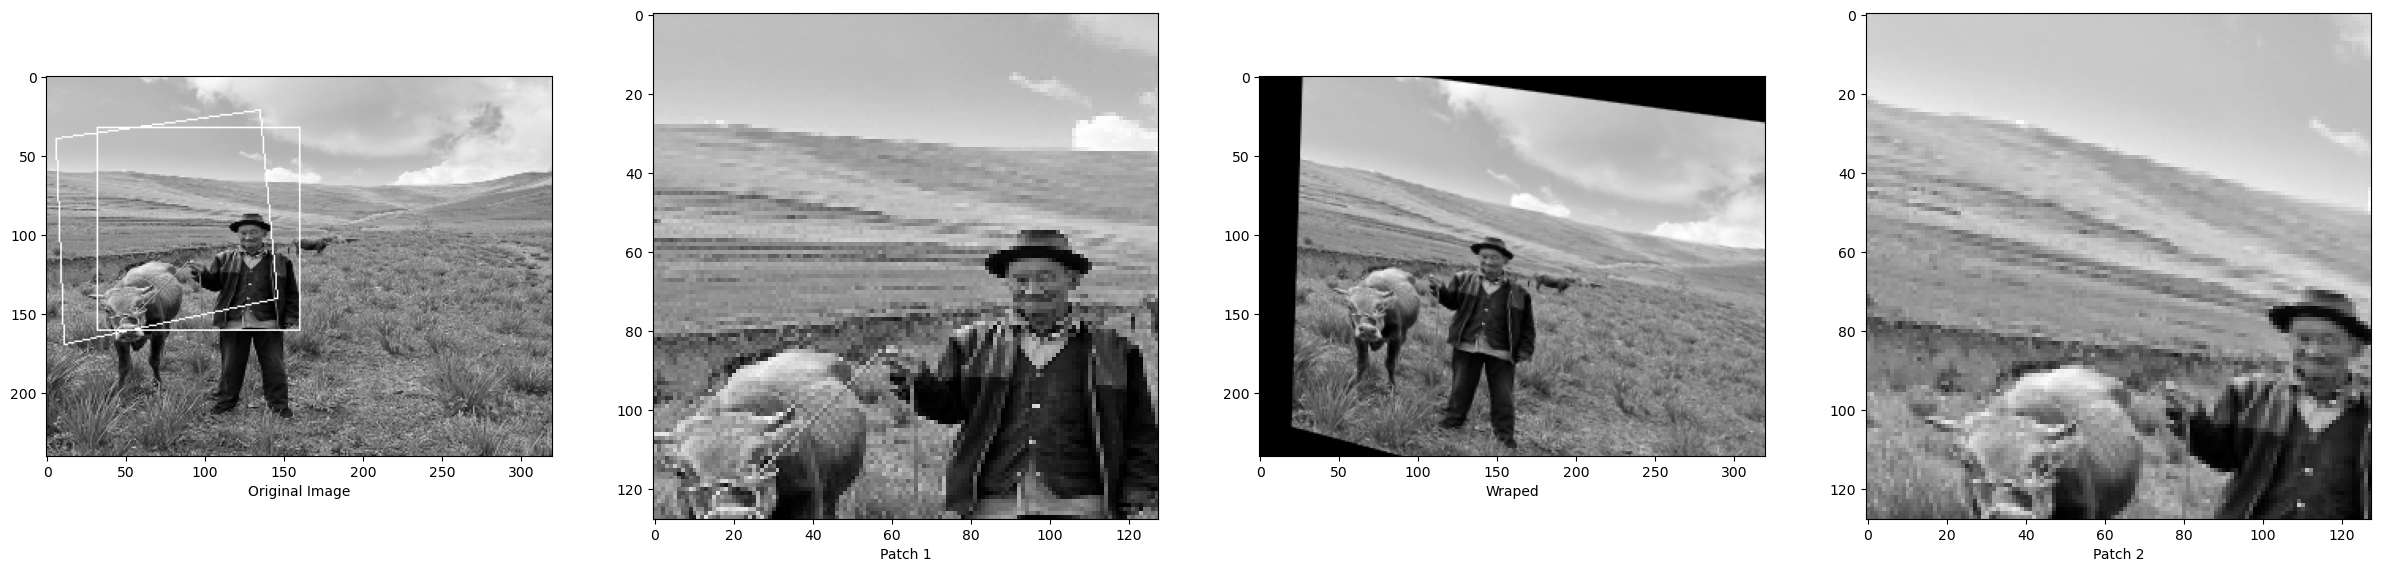

[[-0.8125   0.21875]
 [-0.78125 -0.34375]
 [-0.4375  -0.625  ]
 [-0.65625  0.28125]]


In [4]:
# Example
x, y = Preprocessing(folder, files[9], plot_img = True)
print(y/32)

In [6]:
def generate_dataset(input_folder, out_folder, partition = 'train', num_samples = 500000, img_dim = (320, 240), rho = 32, patch_dim = (128, 128)):
    files       = os.listdir(input_folder)
    destination = os.path.join(out_folder,partition)
    samples     = np.random.choice(files, size = num_samples)
    
    idx = 0
    for s in samples :
        data = Preprocessing(input_folder, s, img_dim = img_dim, rho = rho, patch_dim = patch_dim)
        if data == 'No' :
            continue
        np.save(os.path.join(destination,s[:12]), data)
        
        idx += 1
        if idx % 1000 ==0: 
            print(idx, ', ', end='')       

In [40]:
#train_dataset
generate_dataset(r'/home/esteban/Data/COCO/train2017/', r'/home/esteban/Data/COCO/Homography/', 
                 partition   = 'train', 
                 num_samples = 500000,
                 img_dim     = (320, 240),
                 rho         = 32,
                 patch_dim   = (128, 128)
                )

1000 , 2000 , 3000 , 4000 , 5000 , 6000 , 7000 , 8000 , 9000 , 10000 , 11000 , 12000 , 13000 , 14000 , 15000 , 16000 , 17000 , 18000 , 19000 , 20000 , 21000 , 22000 , 23000 , 24000 , 25000 , 26000 , 27000 , 28000 , 29000 , 30000 , 31000 , 32000 , 33000 , 34000 , 35000 , 36000 , 37000 , 38000 , 39000 , 40000 , 41000 , 42000 , 43000 , 44000 , 45000 , 46000 , 47000 , 48000 , 49000 , 50000 , 51000 , 52000 , 53000 , 54000 , 55000 , 56000 , 57000 , 58000 , 59000 , 60000 , 61000 , 62000 , 63000 , 64000 , 65000 , 66000 , 67000 , 68000 , 69000 , 70000 , 71000 , 72000 , 73000 , 74000 , 75000 , 76000 , 77000 , 78000 , 79000 , 80000 , 81000 , 82000 , 83000 , 84000 , 85000 , 86000 , 87000 , 88000 , 89000 , 90000 , 91000 , 92000 , 93000 , 94000 , 95000 , 96000 , 97000 , 98000 , 99000 , 100000 , 101000 , 102000 , 103000 , 104000 , 105000 , 106000 , 107000 , 108000 , 109000 , 110000 , 111000 , 112000 , 113000 , 114000 , 115000 , 116000 , 117000 , 118000 , 119000 , 120000 , 121000 , 122000 , 123000 , 1

In [ ]:
#test_dataset
generate_dataset(r'/home/esteban/Data/COCO/test2017/', r'/home/esteban/Data/COCO/Homography/', 
                 partition   = 'test', 
                 num_samples = 5000,
                 img_dim     = (640, 480),
                 rho         = 64,
                 patch_dim   = (256, 256)
                )

In [7]:
#train_dataset
generate_dataset(r'/home/esteban/Data/COCO/val2017/', r'/home/esteban/Data/COCO/Homography/', 
                 partition   = 'val', 
                 num_samples = 50000,
                 img_dim     = (320, 240),
                 rho         = 32,
                 patch_dim   = (128, 128)
                )

/home/esteban/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


1000 , 2000 , 3000 , 4000 , 5000 , 6000 , 7000 , 8000 , 9000 , 10000 , 11000 , 12000 , 13000 , 14000 , 15000 , 16000 , 17000 , 18000 , 19000 , 20000 , 21000 , 22000 , 23000 , 24000 , 25000 , 26000 , 27000 , 28000 , 29000 , 30000 , 31000 , 32000 , 33000 , 34000 , 35000 , 36000 , 37000 , 38000 , 39000 , 40000 , 41000 , 42000 , 43000 , 44000 , 45000 , 46000 , 47000 , 48000 , 49000 , 